# Particle Swarm Optimization

For every particle $i$ in the swarm of size $n$, we can update its position vector $\mathbf{x}_i $and its velocity vector $\mathbf{v}_i$ according to the following equations:

$$
\mathbf{x}_i(t+1) = \mathbf{x}_i(t) + \mathbf{v}_i(t+1)\\
\mathbf{v}_i(t+1) = \mathbf{v}_i(t) + c_1\phi_1(t)\otimes(\mathbf{p}_i(t)-\mathbf{x}_i(t)) + c_2\phi_2(t)\otimes(\mathbf{p}_g(t)-\mathbf{x}_i(t)),
$$

where $\mathbf{p}_i(t)$ is the personal best postion of the particle $i$ at time $t$ and $\mathbf{p}_g(t)$ is the global best position at time $t$.

We are going to use the PSO algorithm to find the minimum of a given objective function $f$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [ ]:
def parab(px):
    return px**2

In [ ]:
#1D function

def min_swarm(n,x,pb,v,func,max_it,ub,lb, tol):
    """
    INPUT:
    - n: size of the swarm
    - x: initial position vectors for the n particles
    - pb: vector for personal best positions
    - v: velocity vector
    - max_it: maximum number of iterations
    - ub: upper bound
    - lb: lower bound
    - tol: accuracy treshold
    """
    lista = []
    n_it = 0
    g_b = pb[np.argmin(func(pb))] #global best position
    temp_x = np.copy(x)
    temp_v = np.copy(v)
    temp_pb = np.copy(pb)
    lista.append(temp_x)

    c1 = 0.5
    c2 = 0.3
    v = temp_v + c1*np.random.rand(1,n)*(temp_pb-temp_x) + c2*np.random.rand(1,n)*(g_b -temp_x)
    x = temp_x +v

    # Check if x goes beyond the boundaries of the Search Space
    if(np.min(x[0])<lb):
        ind_m= np.argwhere(x[0]<lb)
        ind_m = ind_m[0]
        x[0][ind_m] = lb
    if(np.max(x[0])>ub):
        ind_M = np.argwhere(x[0]>ub)
        ind_M = ind_M[0]
        x[0][ind_M] = ub

    lista.append(x[0])

    bool_vec = func(x[0])<func(temp_pb[0])
    bool_vec = np.asarray(bool_vec[0])

    pb = np.asarray(pb)
    index = np.argwhere(bool_vec==True)

    pb[index[0::]] = (x[0][index[0::]])
    g_b = pb[np.argmin(func(pb))]

    radius = np.max(abs(x[0]-g_b))/(abs(ub-lb))

    while ( (radius >tol) & (n_it<max_it)):
        temp_x = x
        temp_v = v
        temp_pb = pb
        v = temp_v + c1*np.random.rand(1,n)*(temp_pb-temp_x) + c2*np.random.rand(1,n)*(g_b -temp_x)
        x = temp_x +v
        if(np.min(x[0])<lb):
            ind_m = np.argmin(x[0])
            x[0][ind_m] = lb
        if(np.max(x[0])>ub):
            ind_M = np.argmax(x[0])
            x[0][ind_M] = ub

        lista.append(x[0])
        n_it = n_it+1
        bool_vec = func(x)<func(temp_pb)
        bool_vec = np.asarray(bool_vec[0])

        index = np.argwhere(bool_vec==True)

        pb[index[0::]] = (x[0][index[0::]])
        g_b = pb[np.argmin(func(pb))]
        radius = np.max(abs(x[0]-g_b))/(abs(ub-lb))

    return x,v,pb,n_it,g_b,radius, lista

In [ ]:
n = 5
U = 10
L = -10

#x = x_min + \phi*(x_max - x_min)
x = L + (U-L)*np.random.rand(1,n)
x = x[0] # List object
pb = x # personal best
v = np.zeros([1,n])#velocity vector

In [ ]:
N_x,N_v,N_pb,N_it,g_b,r, lista_Nx= min_swarm(n, x , pb, v, parab, 15, U, L, 1e-4)
print('\n last position vector ', N_x)
print('\n last global best ', g_b)
print('\n number of iterations ', N_it)
print('\n radius of the swarm ', r)

x = N_x[0]
pb = x

v = np.zeros([1,n])#velocity vector



 last position vector  [[-0.05431402  1.04718676  0.32744936  0.06921026 -0.00975972]]

 last global best  -0.00017333014159783434

 number of iterations  15

 radius of the swarm  0.05236800461353336


In [ ]:
lista_Nx[0].shape

(5,)

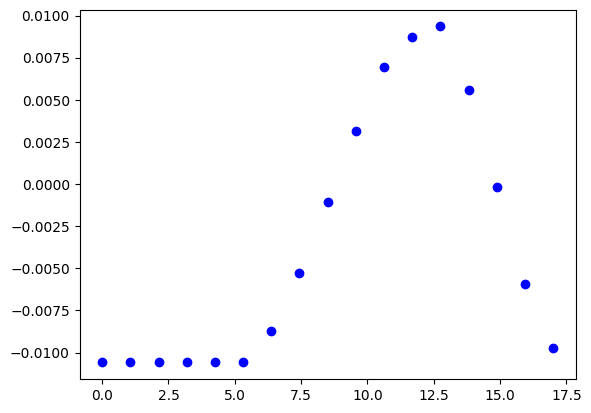

In [ ]:
array_lista = np.asarray(lista_Nx)
plt.plot(np.linspace(0,17,17), array_lista[:,4],'ob')

In [ ]:
def parab2(v):#v is a bidimentional array
    return v[0,:]**2+v[1,:]**2

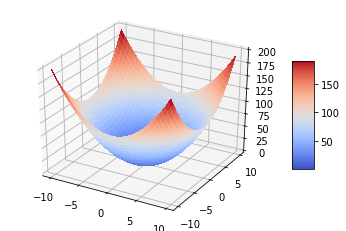

In [ ]:
Xplot = np.arange(L, U, 0.25)
Yplot = np.arange(L, U, 0.25)
XP, YP = np.meshgrid(Xplot, Yplot)
Z = XP**2 + YP**2
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(XP, YP, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

In [ ]:
def diameter(ub,lb):
    # ub, lb are coordinates vectors
    return np.linalg.norm(ub-lb)

In [ ]:
#nD function

def min_swarmND(n,x,pb,v,func,max_it,ub,lb, tol, D = 2):
    """
    INPUT:
    - n: size of the swarm
    - x: initial position vectors for the n particles
    - pb: vector for personal best positions
    - v: velocity vector
    - max_it: maximum number of iterations
    - ub: upper bound
    - lb: lower bound
    - tol: accuracy treshold
    - D : dimension of the search space
    """

    n_it = 0
    g_b = pb[:,np.argmin(func(pb))] #global best position
    temp_x = np.copy(x)
    temp_v = np.copy(v)
    temp_pb = np.copy(pb)

    c1 = 0.5
    c2 = 0.3
    v = temp_v + c1*np.random.rand(D,n)*(temp_pb-temp_x) + c2*np.random.rand(D,n)*(g_b.reshape(D,1) -temp_x)
    x = temp_x +v

    # Check if x goes beyond the boundaries of the Search Space

    x[x<lb] = lb

    x[x>ub] = ub


    bool_vec = func(x)<func(temp_pb)

    pb = np.asarray(pb)
    index = np.argwhere(bool_vec==True)

    pb[:,index[0::]] = (x[:,index[0::]])
    g_b = pb[:,np.argmin(func(pb))]

    radius = np.max(np.linalg.norm(x-g_b.reshape(D,1)))/diameter(np.array([lb, lb]), np.array([ub, ub]))

    while ( (radius >tol) & (n_it<max_it)):
        temp_x = x
        temp_v = v
        temp_pb = pb
        v = temp_v + c1*np.random.rand(D,n)*(temp_pb-temp_x) + c2*np.random.rand(D,n)*(g_b.reshape(D,1) -temp_x)
        x = temp_x +v

        x[x<lb] = lb
        x[x>ub] = ub

        n_it = n_it+1
        bool_vec = func(x)<func(temp_pb)

        index = np.argwhere(bool_vec==True)

        pb[:,index[0::]] = (x[:,index[0::]])
        g_b = pb[:,np.argmin(func(pb))]
        radius = np.max(np.linalg.norm(x-g_b.reshape(D,1)))/diameter(np.array([lb, lb]), np.array([ub, ub]))

    return x,v,pb,n_it,g_b,radius

In [ ]:
n = 5
U = 10
L = -10

#x = x_min + \phi*(x_max - x_min)
x2 = np.array([[L],[L]]) + np.array([[(U-L)],[(U-L)]])*np.random.rand(2,n)

pb2 = x2 # personal best
v2 = np.zeros([2,n])#velocity vector

In [ ]:
Nx2,Nv2,Npb2,n_it2,g_b2,radius2 = min_swarmND(n,x2,pb2,v2,parab2,10,U,L, 1e-3)

x2 = Nx2
pb2 = Npb2

v2 = np.zeros([2,n])#velocity vector

In [ ]:

print('\n last position vector ', Nx2)
print('\n last global best ', g_b2)
print('\n number of iterations ', n_it2)
print('\n radius of the swarm ', radius2)


 last position vector  [[-0.20852075  0.00920802  0.00154385  0.00942879 -0.02397253]
 [ 0.03207399 -0.02519022 -0.06107039  0.01109934  0.00867786]]

 last global best  [0.00281074 0.00865348]

 number of iterations  10

 radius of the swarm  0.008064272269244322
